In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1. Identify the data types of each attribute. (3 points)

In [5]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


## 2. Determine if there are any missing values within the dataset. (4 points)

In [6]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## 3. Examine the correlation between all attributes, excluding Quality. (10 points)

In [7]:
dfX = df.drop('quality', axis=1)

dfX.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


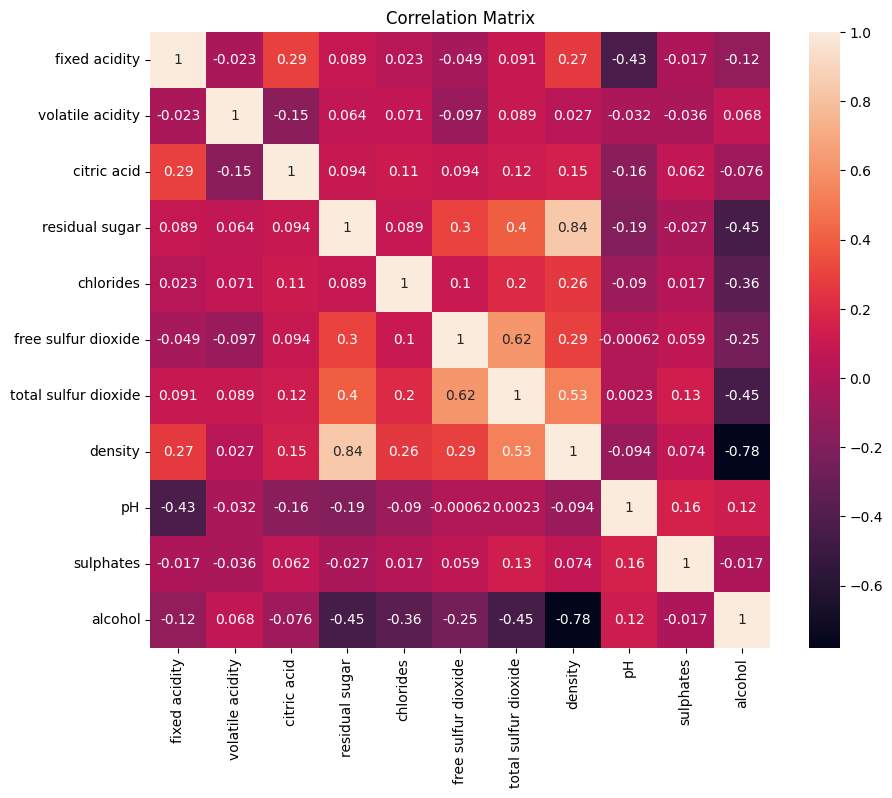

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(dfX.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

## 4. Create a frequency distribution graph for wine quality using the Quality attribute. (10 points)

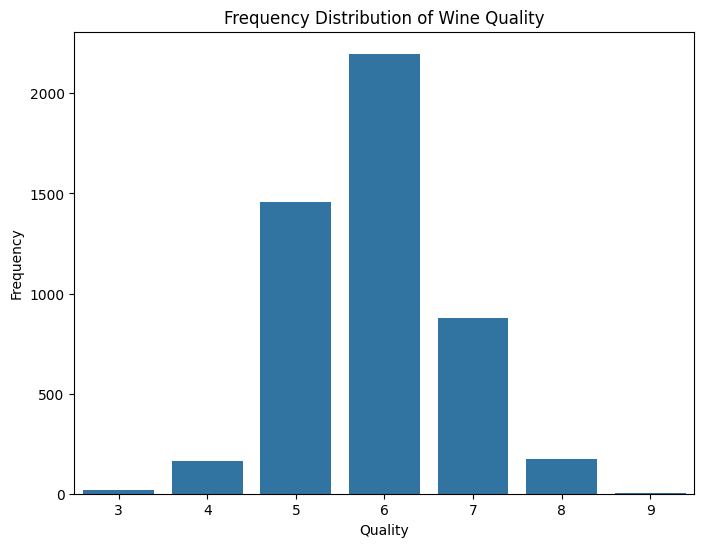

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Frequency Distribution Graph of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

## 5. Reclassify the quality ratings into three levels: high, medium, and low. Assign ratings of 3, 4, 5, and 6 to level 0, and ratings of 7, 8, and 9 to level 1. (10 points)

In [15]:
df['quality_level'] = 0
df.loc[df['quality'] >= 7, 'quality_level'] = 1
df.loc[df['quality'] <= 6, 'quality_level'] = 0

df['quality_level'].value_counts()

,count
quality_level,
0,3838
1,1060


## 6. Normalize the dataset. (12 points)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_features = df.select_dtypes(include=['number']).drop(['quality', 'quality_level'], axis=1)

scaler.fit(numerical_features)

normalized_features = scaler.transform(numerical_features)

df_normalized = pd.DataFrame(normalized_features, columns=numerical_features.columns)

df_normalized = pd.concat([df_normalized, df[['quality', 'quality_level']]], axis=1)

df_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6,0
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6,0
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6,0
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,0
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,0


## 7. Split the dataset into training and testing sets. (12 points)

In [17]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop(['quality_level', 'quality'], axis=1)
y = df_normalized['quality_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

## 8. Apply the Logistic Regression algorithm to predict wine quality based on its attributes. (12 points)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 9. Generate a confusion matrix to evaluate the model's performance. (12 points)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[719,  34],
       [174,  53]])

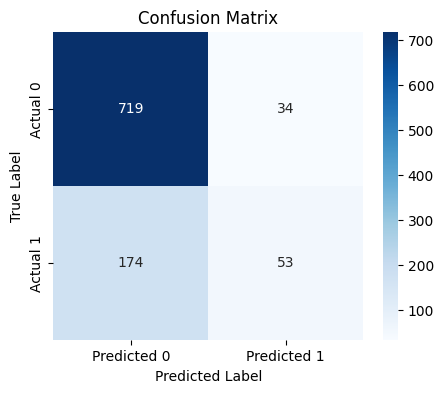

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 10. Assess the model's performance by calculating Accuracy, Recall and Precision. (15 points)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7877551020408163

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       753
           1       0.61      0.23      0.34       227

    accuracy                           0.79       980
   macro avg       0.71      0.59      0.61       980
weighted avg       0.76      0.79      0.75       980

